<a href="https://colab.research.google.com/github/virajvaidya/MACD/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [3]:
#Basic dependencies
import numpy             as np
import pandas            as pd

#For stock data and visualisation
import yfinance          as yf
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [4]:
orgdata = yf.download(tickers='ORG.AX', period='1d', interval='1m')         #ORIGIN
stodata = yf.download(tickers='STO.AX', period='1d', interval='1m')         #SANTOS
whcdata = yf.download(tickers='WHC.AX', period='1d', interval='1m')         #WHITEHAVEN COAL

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
orgticker = yf.Ticker('ORG.AX')
org_df    = orgticker.history(period="5y")
org_df.rename(columns = {'Close':'ORG Close'}, inplace = True)
org_df.tail()

,Open,High,Low,ORG Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-24,5.140,5.21,5.11,5.17,4777817,0.0,0
2021-11-25,5.110,5.14,5.07,5.12,5618958,0.0,0
2021-11-26,5.110,5.12,4.97,4.97,3302959,0.0,0
2021-11-29,4.865,4.96,4.86,4.92,5040139,0.0,0
2021-11-30,4.850,4.92,4.80,4.80,9255344,0.0,0


In [6]:
stoticker = yf.Ticker('STO.AX')
sto_df    = stoticker.history(period="5y")
sto_df.rename(columns = {'Close':'STO Close'}, inplace = True)
sto_df.tail()

,Open,High,Low,STO Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-24,6.90,6.92,6.82,6.89,8012082,0.0,0
2021-11-25,6.90,6.90,6.79,6.82,5983440,0.0,0
2021-11-26,6.78,6.80,6.46,6.49,8271313,0.0,0
2021-11-29,6.35,6.49,6.33,6.39,13031032,0.0,0
2021-11-30,6.38,6.46,6.34,6.38,16887663,0.0,0


In [7]:
whcticker = yf.Ticker('WHC.AX')
whc_df    = whcticker.history(period="5y")
whc_df.rename(columns = {'Close':'WHC Close'}, inplace = True)
whc_df.tail()

,Open,High,Low,WHC Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-24,2.530,2.590,2.500,2.54,8969823,0.0,0
2021-11-25,2.590,2.620,2.560,2.56,8653096,0.0,0
2021-11-26,2.580,2.585,2.410,2.44,12185453,0.0,0
2021-11-29,2.395,2.470,2.395,2.41,11598185,0.0,0
2021-11-30,2.390,2.420,2.360,2.42,9439965,0.0,0


In [8]:
import pandas as pd
df = pd.concat([org_df['ORG Close'], sto_df['STO Close'], whc_df['WHC Close']], axis=1)

In [9]:
df.tail()

,ORG Close,STO Close,WHC Close
Date,,,
2021-11-24,5.17,6.89,2.54
2021-11-25,5.12,6.82,2.56
2021-11-26,4.97,6.49,2.44
2021-11-29,4.92,6.39,2.41
2021-11-30,4.80,6.38,2.42


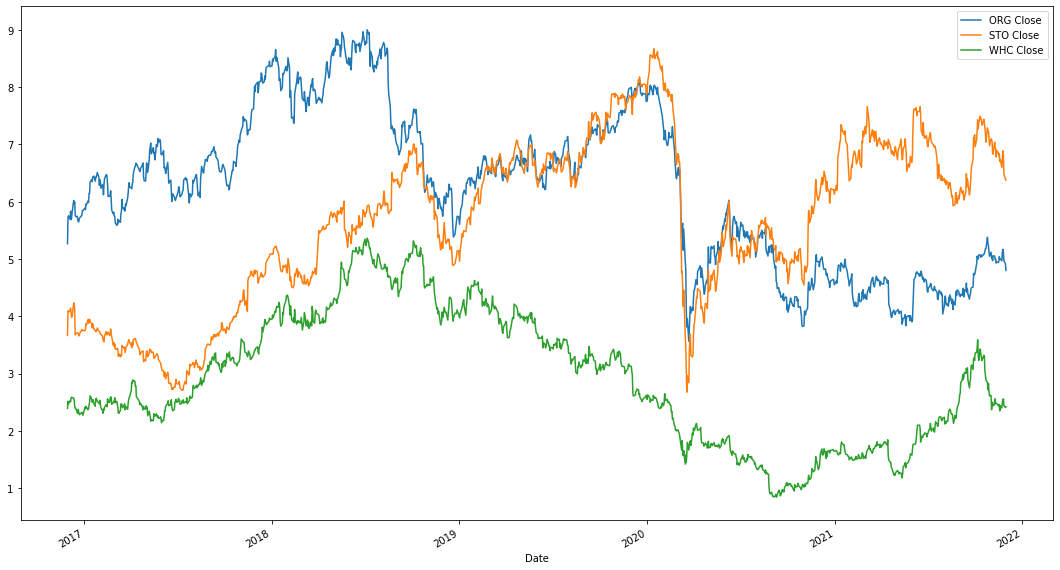

In [10]:
import matplotlib as plt
df.plot()
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [11]:
orgexp1 = org_df['ORG Close'].ewm(span=12, adjust=False).mean()
orgexp2 = org_df['ORG Close'].ewm(span=26, adjust=False).mean()
orgmacd = orgexp1 - orgexp2
orgexp3 = orgmacd.ewm(span=9, adjust=False).mean()

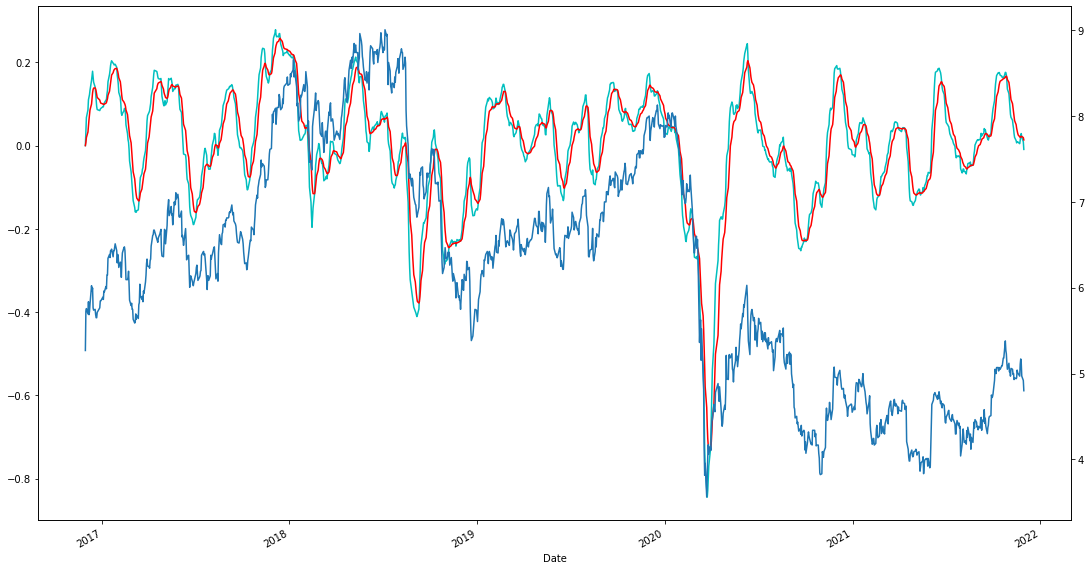

In [12]:
orgmacd.plot(label='ORG MACD', color='c')
ax = orgexp3.plot(label='Signal Line', color='r')
org_df['ORG Close'].plot(ax=ax, secondary_y=True, label='ORG')
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [13]:
stoexp1 = sto_df['STO Close'].ewm(span=12, adjust=False).mean()
stoexp2 = sto_df['STO Close'].ewm(span=26, adjust=False).mean()
stomacd = stoexp1 - stoexp2
stoexp3 = stomacd.ewm(span=9, adjust=False).mean()

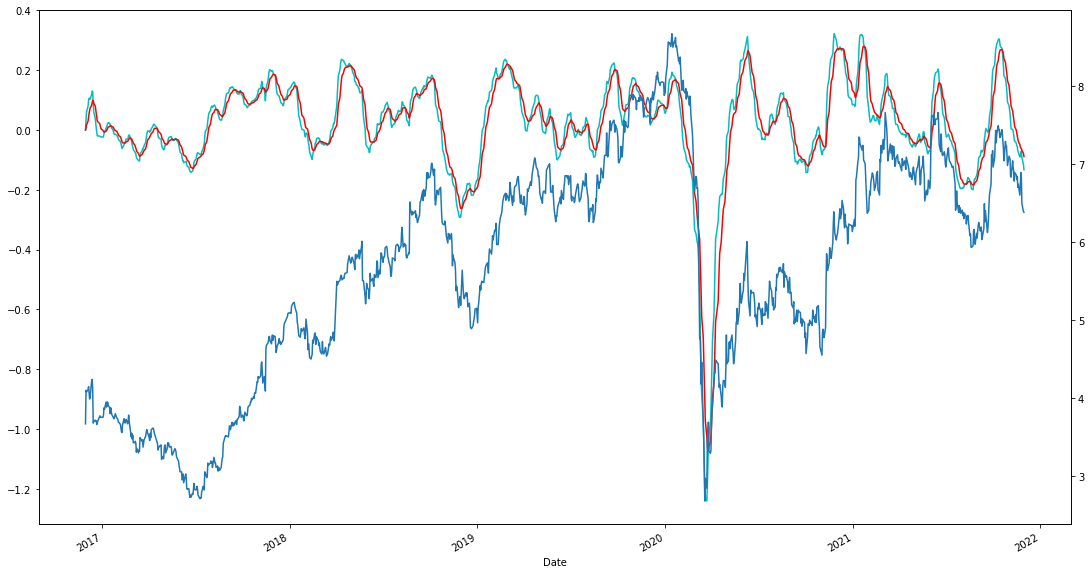

In [14]:
stomacd.plot(label='STO MACD', color='c')
ax = stoexp3.plot(label='Signal Line', color='r')
sto_df['STO Close'].plot(ax=ax, secondary_y=True, label='ORG')
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [15]:
whcexp1 = whc_df['WHC Close'].ewm(span=12, adjust=False).mean()
whcexp2 = whc_df['WHC Close'].ewm(span=26, adjust=False).mean()
whcmacd = whcexp1 - whcexp2
whcexp3 = whcmacd.ewm(span=9, adjust=False).mean()

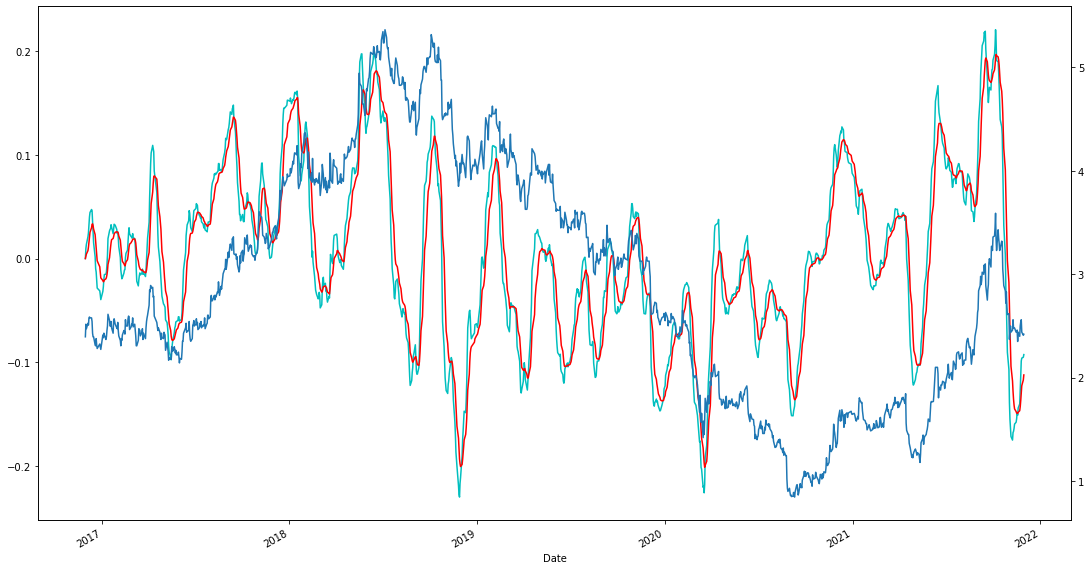

In [16]:
whcmacd.plot(label='WHC MACD', color='c')
ax = whcexp3.plot(label='Signal Line', color='r')
whc_df['WHC Close'].plot(ax=ax, secondary_y=True, label='ORG')
fig = plt.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)